In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../datasets/student_clustering.csv')
df.sample(2)

,cgpa,iq
49,5.67,109
155,8.23,95


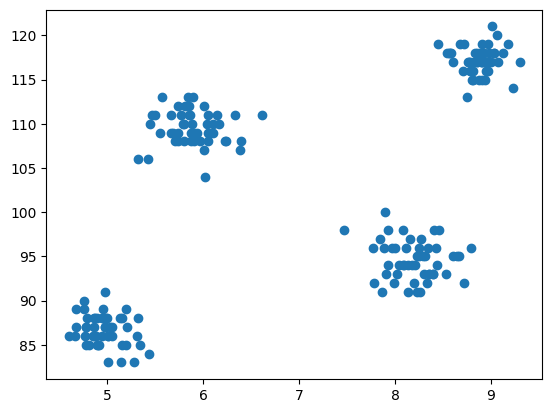

In [3]:
plt.scatter(df['cgpa'], df['iq'])

In [4]:
wscc = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wscc.append(km.inertia_)

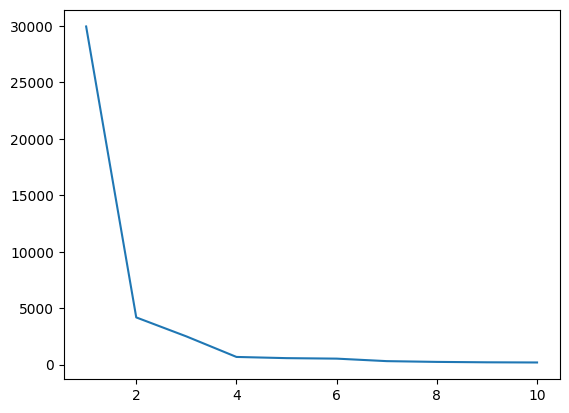

In [5]:
plt.plot(range(1,11), wscc)

In [6]:
km = KMeans(n_clusters=4)
y_means = km.fit_predict(df)
y_means

array([0, 2, 3, 3, 2, 2, 3, 1, 2, 3, 0, 2, 3, 0, 2, 3, 2, 3, 2, 2, 3, 0,
       3, 0, 0, 3, 0, 1, 3, 2, 1, 2, 1, 2, 3, 3, 1, 2, 0, 2, 0, 3, 3, 0,
       1, 1, 3, 2, 1, 2, 0, 0, 1, 3, 1, 2, 2, 1, 2, 1, 2, 3, 3, 1, 0, 1,
       3, 0, 2, 3, 2, 1, 3, 0, 2, 1, 2, 1, 0, 3, 3, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 3, 0, 3, 3, 1, 3, 0, 1, 2, 0, 0, 1, 0, 0, 3, 0, 1, 1,
       3, 1, 2, 2, 3, 1, 3, 2, 1, 0, 0, 2, 3, 1, 3, 0, 3, 2, 0, 3, 3, 2,
       0, 0, 2, 1, 2, 0, 3, 3, 3, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1,
       0, 3, 2, 1, 2, 3, 0, 1, 2, 3, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 3,
       1, 2, 0, 1, 1, 2, 2, 2, 3, 0, 3, 3, 1, 2, 3, 3, 0, 0, 3, 0, 1, 2,
       2, 1], dtype=int32)

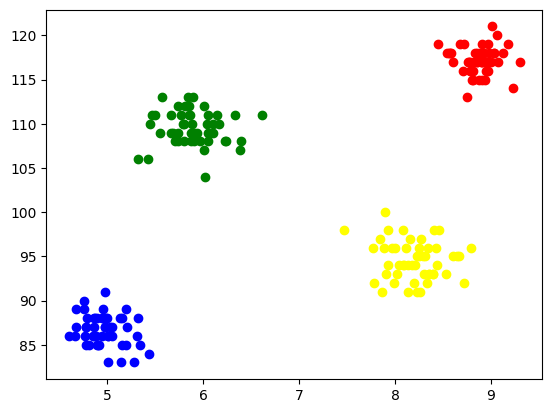

In [7]:
plt.scatter(df.iloc[y_means == 0, 0], df.iloc[y_means == 0, 1], color='blue')
plt.scatter(df.iloc[y_means == 1, 0], df.iloc[y_means == 1, 1], color='red')
plt.scatter(df.iloc[y_means == 2, 0], df.iloc[y_means == 2, 1], color='green')
plt.scatter(df.iloc[y_means == 3, 0], df.iloc[y_means == 3, 1], color='yellow')
plt.show()

In [8]:

from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [9]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [10]:

wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

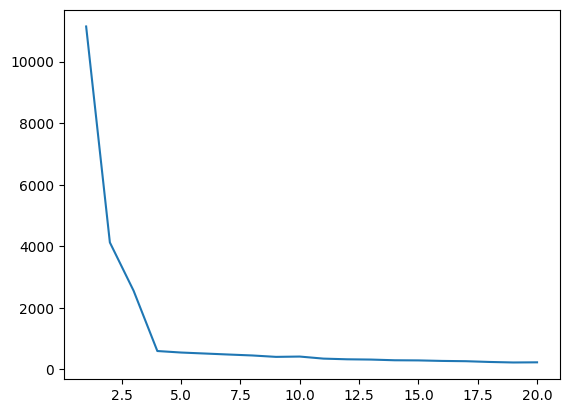

In [11]:
plt.plot(range(1,21),wcss)

In [12]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [13]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [14]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()